In [205]:
import pandas as pd
data = pd.read_csv(r'ecg.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [206]:
print(data.shape)

(4998, 141)


In [207]:
features = data.drop(140,axis=1)
target = data[140]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,stratify=target)
x_train_index = x_train[x_train==1].index
train_data = x_train.loc[x_train_index]

In [208]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = mmscaler.fit_transform(train_data.copy())
x_test_scaled = mmscaler.transform(x_test.copy())

In [209]:
x_test_scaled.shape[0]

1000

In [210]:
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout
class AutoEncoder(Model):
    def __init__(self,output_units,ldim=8):
        super().__init__()
        self.encoder = Sequential([
          Dense(64,activation="relu"),
          Dropout(rate=0.1),
          Dense(32,activation="relu"),
          Dropout(rate=0.1),
          Dense(16,activation="relu"),
          Dropout(rate=0.1),
          Dense(ldim,activation="relu")
        ])
        self.decoder = Sequential([
          Dense(16,activation="relu"),
          Dropout(rate=0.1),
          Dense(32,activation="relu"),
          Dropout(rate=0.1),
          Dense(64,activation="relu"),
          Dropout(rate=0.1),
          Dense(output_units,activation="sigmoid")
        ])
        
    def call(self,input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded

In [211]:
model = AutoEncoder(output_units = x_train_scaled.shape[1])
model.compile(loss="msle",metrics=["mse"],optimizer="adam")
history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs = 20,
    batch_size=512,
    validation_data = (x_test_scaled,x_test_scaled)
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0110 - mse: 0.0267 - val_loss: 0.0098 - val_mse: 0.0239
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mse: 0.0224 - val_loss: 0.0074 - val_mse: 0.0178
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mse: 0.0165 - val_loss: 0.0057 - val_mse: 0.0134
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mse: 0.0129 - val_loss: 0.0048 - val_mse: 0.0113
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mse: 0.0110 - val_loss: 0.0045 - val_mse: 0.0106
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mse: 0.0104 - val_loss: 0.0044 - val_mse: 0.0103
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mse: 0.0104 - val_loss: 0.0043 - val_mse: 0.0101
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mse: 0.0100 - val_loss: 0.0042 - val_mse: 0.0098
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mse: 0.0094 - val_loss

C:\Users\jayesh badgujar\AppData\Local\Temp\ipykernel_21108\822109396.py:6: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend('loss','val_loss')
C:\Users\jayesh badgujar\AppData\Local\Temp\ipykernel_21108\822109396.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('loss','val_loss')


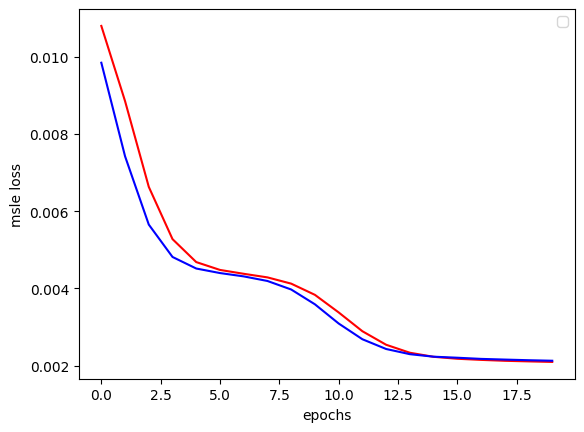

In [212]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.xlabel('epochs')
plt.ylabel('msle loss')
plt.legend('loss','val_loss')
plt.show()

In [213]:
#finding threshold for anomaly and doing predictions
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0 if x == True else 1)
    return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold: 0.005011338962987776


In [214]:
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


0.605

In [215]:
predictions

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Length: 1000, dtype: int64